## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
# #讓圖可以在 jupyter notebook顯示
# %matplotlib inline

In [2]:
df_train = pd.read_csv("./D36-41 探索性資料分析 (EDA)_Dataset/Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

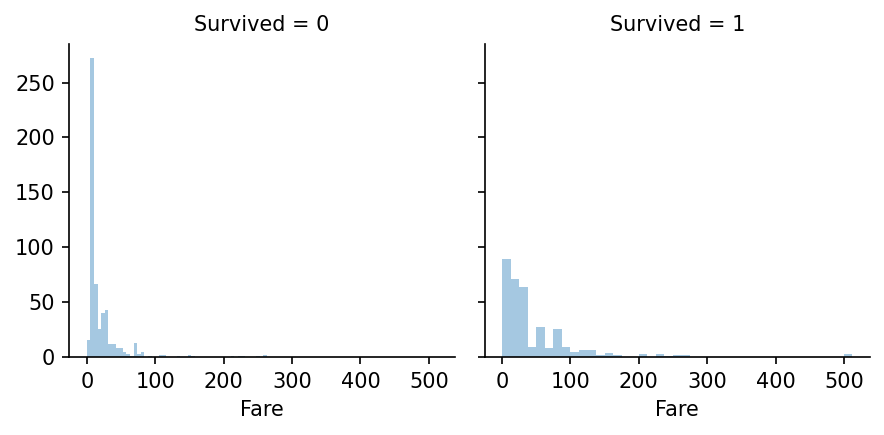

In [7]:
plt.rcParams["figure.dpi"] = 150
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)
plt.show()

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [4]:
print(df_train['Fare'].describe()) 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [5]:
fare_mean = np.mean(df_train['Fare'])
fare_stdev = np.std(df_train['Fare'])
z_scores = [(fare - fare_mean) / fare_stdev for fare in df_train['Fare']]
ab_fare_index = np.where(np.abs(z_scores) > 3)
df_abnormal = df_train.loc[ab_fare_index[0],'Fare'].to_frame()

print(f'不符3倍標準差原則的異常值:\n{df_abnormal}')

不符3倍標準差原則的異常值:
         Fare
27   263.0000
88   263.0000
118  247.5208
258  512.3292
299  247.5208
311  262.3750
341  263.0000
377  211.5000
380  227.5250
438  263.0000
527  221.7792
557  227.5250
679  512.3292
689  211.3375
700  227.5250
716  227.5250
730  211.3375
737  512.3292
742  262.3750
779  211.3375


## 方法3-盒鬚圖判別法(IQR method)

在d = 1.5上下邊界外的異常值:
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


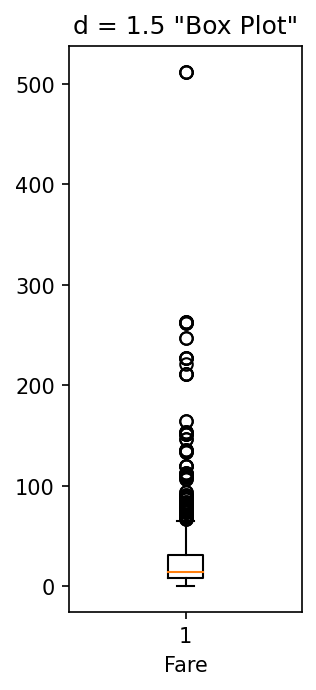

In [6]:
q1, q3 = np.nanpercentile(df_train['Fare'], [25, 75])
upper_bound = q3 + (q3 - q1) * 1.5
lower_bound = q1 - (q3 - q1) * 1.5
ab_fare_index = np.where((df_train['Fare'] > upper_bound) | (df_train['Fare'] < lower_bound))
df_abnormal = df_train.loc[ab_fare_index[0], 'Fare'].to_frame()
print(f'在d = 1.5上下邊界外的異常值:\n{df_abnormal}')

#作圖
plt.figure(figsize=(2,5))
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])], whis = 1.5)    # 使用np.isnana(data)然後逐位反轉，可以透過索引的方式，濾掉遺失值。
plt.title('d = 1.5 "Box Plot"')
plt.xlabel("Fare")
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


##### 不一定是真的異常值，可能會依艙等不同而有不同的票價，故需要額外資訊來輔助判斷。